## Model 04 : Support Vector Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
house_df = pd.read_csv('Housing.csv')

for i, ele in enumerate(house_df):
    print(f'{i}: {ele}')

0: price
1: area
2: bedrooms
3: bathrooms
4: stories
5: mainroad
6: guestroom
7: basement
8: hotwaterheating
9: airconditioning
10: parking
11: prefarea
12: furnishingstatus


In [3]:
# dropping columns for hyper parmeter tuning
# house_df = house_df.drop(columns=['bathrooms','stories', 'mainroad', 'guestroom', 'basement','parking', 'prefarea'])
house_df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


### Checking binary and ordinal data counts in each column

In [4]:
house_df.head(5)

house_df['hotwaterheating'].value_counts()

hotwaterheating
no     520
yes     25
Name: count, dtype: int64

In [5]:
house_df['airconditioning'].value_counts()

airconditioning
no     373
yes    172
Name: count, dtype: int64

In [6]:
house_df['furnishingstatus'].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

### Encoding the binary and ordinal columns

In [7]:
# Binary data encoding 
bi_mapping = {"no" : 0, "yes" : 1}
# 
# house_df['hotwaterheating_encoded'] = house_df['hotwaterheating'].map(bi_mapping)
house_df['airconditioning_encoded'] = house_df['airconditioning'].map(bi_mapping)

# house_df['mainroad_ecoded'] = house_df['mainroad'].map(bi_mapping)
house_df['guestroom_ecoded'] = house_df['mainroad'].map(bi_mapping)
# house_df['basement_ecoded'] = house_df['basement'].map(bi_mapping) 
# house_df['prefarea_ecoded'] = house_df['prefarea'].map(bi_mapping)

In [8]:
furnishingstatus_mapping = {"unfurnished" : 0, "semi-furnished" : 1, "furnished" : 2}

house_df['furnishingstatus_encoded'] = house_df['furnishingstatus'].map(furnishingstatus_mapping)

### Dropping columns that are encoded

In [9]:
house_df = house_df.drop(columns=['hotwaterheating','airconditioning','furnishingstatus'])
house_df = house_df.drop(columns=['mainroad', 'guestroom', 'basement', 'prefarea'])
# house_df = house_df.drop(columns=['stories'])
# house_df = house_df.drop(columns=['bedrooms'])
house_df = house_df.drop(columns=['bathrooms'])
# house_df = house_df.drop(columns=['parking'])
# house_df = house_df.drop(columns=['area'])

house_df.head(5)

,price,area,bedrooms,stories,parking,airconditioning_encoded,guestroom_ecoded,furnishingstatus_encoded
0,13300000,7420,4,3,2,1,1,2
1,12250000,8960,4,4,3,1,1,2
2,12250000,9960,3,2,2,0,1,1
3,12215000,7500,4,2,3,1,1,2
4,11410000,7420,4,2,2,1,1,2


### Dividing up the dependent and independent variables to X and y


In [10]:
X = house_df.iloc[:, 1:]
y = house_df.iloc[:, 0].values
y = y.reshape(len(y),1)

### Spliting the training and test set to a 80:20 proportion

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [12]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

In [13]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [14]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)).reshape(-1,1))
np.set_printoptions(precision=2)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance Metrics:")
# print(f"Mean Squared Error (MSE): {mse:.2f}")
# print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-Squared (R2): {r2:.4f}")


Model Performance Metrics:
R-Squared (R2): 0.6483


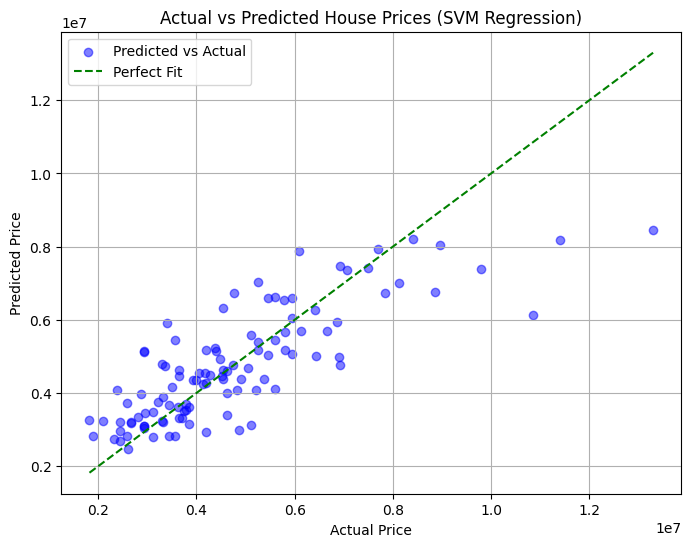

In [16]:
# Plot Actual vs. Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linestyle='--', label="Perfect Fit")

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices (SVM Regression)")
plt.legend()
plt.grid(True)
plt.show()